## Imports 

In [1]:
from SETUP import *
from REDUCE_FEATURES import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data_file = '/Users/Winnifred/Desktop/Capstone/ICPSR_20240_RAWDATA/DS0001/20240-0001-Data.tsv'
filenames = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/data/feature_group_file_names.txt'
csv_root_path = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/data/feature_name_data/'

In [3]:
set_inst = Setup(csv_root_path, filenames)
full_dict = set_inst.execute_setup()
reduce_inst = Reduce_Features(data_file, full_dict)
dirty_df = reduce_inst.execute_reduce()

In [4]:
def get_group(feature, full_dict):
    for akey, apair in full_dict.items():
        for bkey, bpair in apair.items(): 
            if feature == bkey: 
                return akey

In [5]:
def get_descriptions(feature, full_dict):
    for akey, apair in full_dict.items():
        for bkey, bpair in apair.items(): 
            if feature == bkey: 
                return bpair[0]   

# Step 1
## Understand Landscape of DataFrame

In [6]:
dirty_df.head()

,V01626,V01627,V01628,V01629,V01630,V01631,V01632,V01633,V01634,V01635,...,V08501,V08500,V08553,V09045,V09048,V07750,V07748,V07899,V09043,V09046
0,,,,,,,,,,,...,5,5,5,,,5,5,5,,
1,,,,,,,,,,,...,5,5,5,,,5,5,5,,
2,,,,,,,,,,,...,5,5,5,,,5,5,5,,
3,,,,,,,,,,,...,5,5,5,,,5,5,5,,
4,,,,,,,,,,,...,5,5,5,,,5,5,5,,


In [7]:
description = dirty_df.describe()
# these features (below) are: 
# sampling error stratum, region of country, sex, work status 3 categories, total height-inches, weight in pounds

In [8]:
description

,V08929,V08992,V09036,V07306,V08172,V07477,V07292,V07297,V08249
count,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000,20013.000000
mean,0.620247,2.645081,1.572778,43.380403,2.534353,0.463349,0.199320,1.802828,2.464798
std,0.485337,1.053107,0.494687,16.715463,1.061558,0.878212,0.509156,0.875693,1.481386
min,0.000000,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,30.000000,2.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000,41.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,1.000000,3.000000,2.000000,54.000000,3.000000,1.000000,0.000000,2.000000,3.000000
max,1.000000,4.000000,2.000000,99.000000,4.000000,4.000000,3.000000,5.000000,7.000000


Ok. This dataframe has all of the "universal" features and is limited to those whose input range was between -9 and 5. Typical unique values in a column will be ['-9', '-8', '1', '5', ' ']. 

We are starting out with 20,013 data points and 1,219 features. 

In describe, it only gives me six features. I'd like to see what those are: 

In [9]:
demo_features = list(description)

In [10]:
for feature in demo_features:
    print(feature, get_descriptions(feature, full_dict))

V08929 r interviewed post september 11 2001
V08992 region of country
V09036 sex
V07306 age
V08172 years of education-4 categories
V07477 number of children in hh
V07292 number of adolescents 13-17 in hh
V07297 number of adults in hh
V08249 total number of hh members


In [11]:
demographic_features = ['V08992', 'V09036', 'V08172', 'V07306']

# Step 2
## 2.A - Create DF with Desired Features

In [12]:
dirty_df['V07306']

0        36
1        34
2        28
3        50
4        53
5        35
6        32
7        31
8        26
9        50
10       24
11       75
12       48
13       74
14       39
15       20
16       36
17       22
18       25
19       22
20       34
21       33
22       19
23       32
24       19
25       35
26       37
27       33
28       45
29       60
         ..
19983    43
19984    63
19985    34
19986    82
19987    37
19988    31
19989    63
19990    48
19991    18
19992    20
19993    30
19994    42
19995    24
19996    36
19997    24
19998    70
19999    44
20000    24
20001    36
20002    44
20003    37
20004    28
20005    25
20006    39
20007    27
20008    21
20009    20
20010    41
20011    47
20012    28
Name: V07306, Length: 20013, dtype: int64

In [13]:
def create_basic_df(dirty_df): 
    df = pd.DataFrame()
    df['Region'] = dirty_df['V08992']
    df['Gender'] = dirty_df['V09036']
    df['Yrs of Edu'] = dirty_df['V08172']
    df['Age'] = dirty_df['V07306']
    df['Work Status'] = dirty_df['V09154']
    df['Physical Health'] = dirty_df['V00233']
    df['Mental Health'] = dirty_df['V00234']
    df['Suicide Ideation'] = dirty_df['V01993']
    return df 

In [14]:
df = create_basic_df(dirty_df)

In [15]:
df.head()

,Region,Gender,Yrs of Edu,Age,Work Status,Physical Health,Mental Health,Suicide Ideation
0,1,1,4,36,1,3,3,5
1,1,2,4,34,1,3,1,
2,1,2,4,28,3,3,2,5
3,1,1,4,50,1,2,1,5
4,1,2,3,53,1,1,1,


## Remove rows where invalid for Suicide Ideation

In [16]:
df = df.drop(df[df['Suicide Ideation'] == ' '].index)

In [17]:
df.head()

,Region,Gender,Yrs of Edu,Age,Work Status,Physical Health,Mental Health,Suicide Ideation
0,1,1,4,36,1,3,3,5
2,1,2,4,28,3,3,2,5
3,1,1,4,50,1,2,1,5
5,1,2,4,35,1,3,1,1
6,1,2,4,32,1,2,2,5


In [18]:
## Turn strings to ints 
mask = {str(num): num for num in range(150)}

In [19]:
type(df['Work Status'].values[50])

str

In [20]:
# features that need to be turned from str to int
feat_to_convert = ['Work Status', 'Physical Health', 'Mental Health', 'Suicide Ideation']
for feature in feat_to_convert: 
    df[feature] = df[feature].map(mask)

In [21]:
dict_conv = {'Region': float, 'Gender': float, 'Yrs of Edu': float, 'Age': float}

In [22]:
df = df.astype(dict_conv)

In [23]:
df = df.dropna()

In [24]:
df.describe()

,Region,Gender,Yrs of Edu,Age,Work Status,Physical Health,Mental Health,Suicide Ideation
count,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000
mean,2.625090,1.594343,2.457825,41.869427,1.590858,2.578456,2.156708,4.526084
std,1.089881,0.491044,1.067134,16.020153,0.862806,1.064985,1.014925,1.292764
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,29.000000,1.000000,2.000000,1.000000,5.000000
50%,3.000000,2.000000,2.000000,40.000000,1.000000,3.000000,2.000000,5.000000
75%,3.000000,2.000000,3.000000,52.000000,3.000000,3.000000,3.000000,5.000000
max,4.000000,2.000000,4.000000,95.000000,3.000000,5.000000,5.000000,5.000000


In [25]:
df['Suicide Ideation'].isnull().values.any()

False

## Let's plot for whatever reason

In [26]:
import seaborn as sns
sns.set(style='ticks')

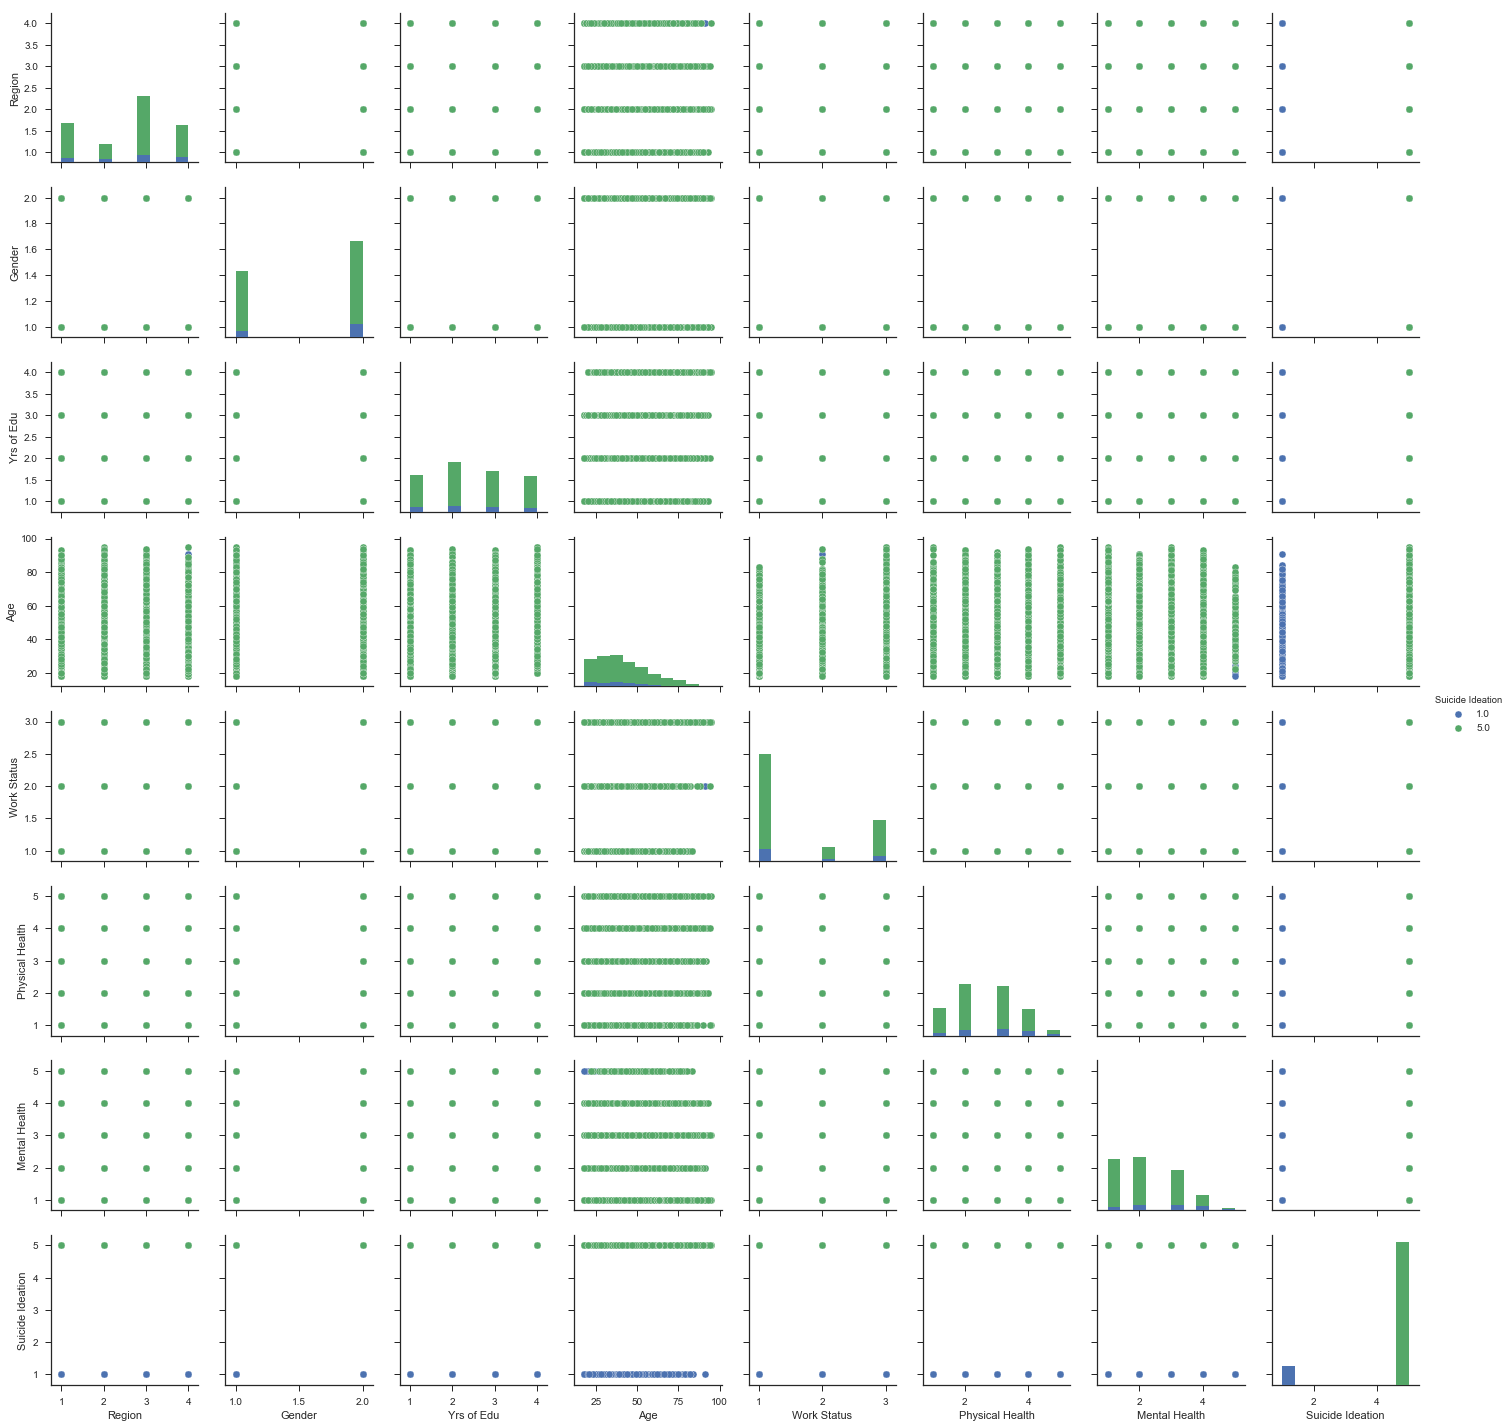

In [27]:
sns.pairplot(df, hue='Suicide Ideation')
plt.show()

# Step 3  


In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [29]:
X_df = df.loc[:, df.columns != 'Suicide Ideation']
y_df = df['Suicide Ideation']

In [30]:
y_df = y_df.map({5:0, 1:1})

In [31]:
X = X_df.as_matrix()
y = y_df.as_matrix()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6829, 7) (6829,)
(2928, 7) (2928,)


## Logistic Regression

In [61]:
logreg = linear_model.LogisticRegression()

In [62]:
lr_model = logreg.fit(X_train, y_train)

In [63]:
lr_y_pred = logreg.predict(X_test)

In [37]:
print('Score:', model.score(X_test, y_test))

Score: 0.882513661202


In [38]:
def print_scores(y_test, predictions):
    print('Accuracy:', accuracy_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print('Recall:', recall_score(y_test, predictions))
    return None

In [39]:
print_scores(y_test, y_pred)

Accuracy: 0.882513661202
Precision: 0.5
Recall: 0.00290697674419


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [53]:
clf = RandomForestClassifier(max_depth=20, random_state=0)

In [64]:
rf_model = clf.fit(X_train, y_train)

In [55]:
print(clf.feature_importances_)

[ 0.11530523  0.03585367  0.09093097  0.50732139  0.05338835  0.10432736
  0.09287303]


In [65]:
rf_y_pred = clf.predict(X_test)

In [57]:
print_scores(y_test, y_pred)

Accuracy: 0.857923497268
Precision: 0.227272727273
Recall: 0.0872093023256


In [58]:
train_pred = model.predict(X_train)
print_scores(y_train, train_pred)

Accuracy: 0.881241763069
Precision: 0.666666666667
Recall: 0.00246305418719


## ROC Curve

In [67]:
from sklearn.metrics import confusion_matrix, roc_curve

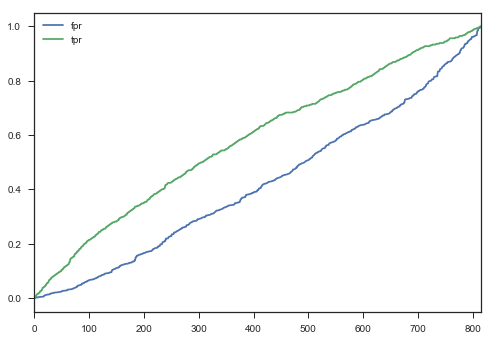

In [68]:
lr_preds = lr_model.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_preds)
lr_df = pd.DataFrame(dict(fpr=lr_fpr, tpr=lr_tpr))
lr_df.plot()

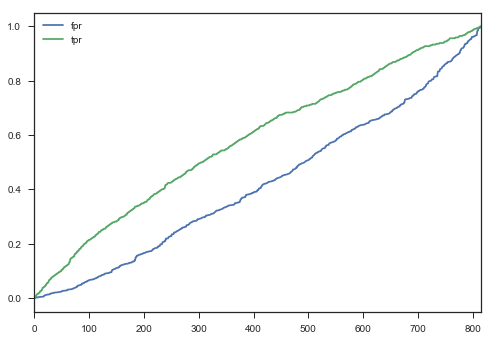

In [71]:
rf_preds = rf_model.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
rf_df = pd.DataFrame(dict(fpr=lr_fpr, tpr=lr_tpr))
rf_df.plot()

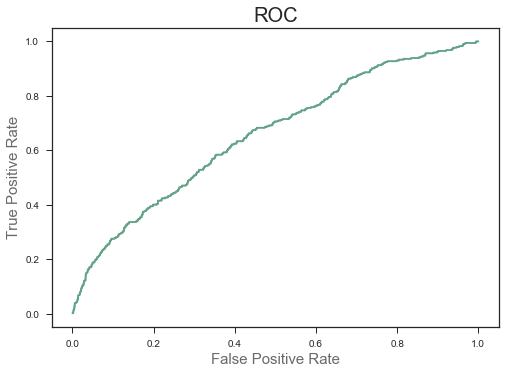

In [72]:
plt.figure(1)
plt.subplot()
plt.plot(lr_df.fpr, lr_df.tpr, label='Log Reg', alpha=0.7)
plt.subplot()
plt.plot(rf_df.fpr, rf_df.tpr, label='Rand For', alpha=0.7)

plt.xlabel('False Positive Rate',{'fontsize':15},color='#696969')
plt.ylabel('True Positive Rate',{'fontsize':15},color='#696969')

plt.title("ROC",{'fontsize':20})

# plt.legend('AB')

plt.show()

In [73]:
path = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/src/basic_roc_df.csv'

EXPORT RANDOM FOREST DATAFRAME TO CSV FOR USING IN MAIN ROC CURVE

In [76]:
rf_df.to_csv(path_or_buf=path, index=False)

In [75]:
rf_df.head()

,fpr,tpr
0,0.000000,0.002907
1,0.001161,0.002907
2,0.001161,0.005814
3,0.002322,0.005814
4,0.002322,0.011628


In [78]:
lr_path = '/Users/Winnifred/Desktop/Capstone/diagnosis_capstone/src/lr_basic_roc_df.csv'

In [79]:
lr_df.to_csv(path_or_buf=lr_path, index=False)